# Modeling For Home-Credit

# Table of Content
1. [Introduction](#Introduction)
2. [Data import and Loading](#data_import)
3. [Data Cleaning](#data_cleaning)
4. [Data Encoding](#Data_encoding)
5. [Data Up sampling](#Upsampling)
6. [Analysis ready Data](#data_ready)
7. [Regression model](#regression)
8. [RandomForest model](#Randomforest)
9. [Results](#results)

##<a name = "Introduction"> 1. Introduction</a>

Home Credit is a multinational financial institution that specializes in providing loans to individuals with inadequate credit history. They aim to promote financial inclusion by offering accessible financial services to underprivileged populations. Home Credit develops creative financing solutions by using non-traditional data sources and other alternative techniques to evaluate creditworthiness. Their customer-centric approach and fast, convenient lending process empower individuals to make important purchases and build a positive credit history. Home Credit reduces the risks involved with lending to borrowers with spotty credit histories by using advanced risk management models. Overall, they strive to democratize access to financial services and create a positive social impact.

This notebook will walk you through the data available and how that data is used to train a model which Home Credit will then use to predict if a future applicant will default on their loan or not.

##<a name = "data_import"> 2. Data import and loading</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
import missingno as msno
from scipy.stats import zscore #to compute zscore
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
folder_path = '/content/drive/MyDrive/home-credit-default-risk/'

#### <a name = "train"> Application Train and Test Dataset Overview </a>

In [6]:
application_train = pd.read_csv(folder_path+'application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Application train|test: The key details about loan applicants are shown in this table. Each column in the table contains information about the applicant's financial situation, credit history, and other factors. Each row represents a single loan application.

In [7]:
filtered_df = application_train[application_train['TARGET'] == 1]
filtered_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
filtered_df = application_train[application_train['TARGET'] == 1]
total_credit_amt = round(application_train['AMT_CREDIT'].sum()/1e6,2)
print("Total credit amount in millions:", total_credit_amt)
defaulted_credit_amt = round(filtered_df['AMT_CREDIT'].sum()/1e6,2)
print("Total deafult credit amount in millions:", defaulted_credit_amt)
print(" Defalut value in percentage of total credit value:",round((defaulted_credit_amt*100/total_credit_amt),2),"%")


Total credit amount in millions: 184207.08
Total deafult credit amount in millions: 13846.85
 Defalut value in percentage of total credit value: 7.52 %


In [9]:
POS_CASH_balance = pd.read_csv(folder_path+'POS_CASH_balance.csv')
bureau_balance = pd.read_csv(folder_path+'bureau_balance.csv')
previous_application = pd.read_csv(folder_path+'previous_application.csv')
installments_payments = pd.read_csv(folder_path+'installments_payments.csv')
credit_card_balance = pd.read_csv(folder_path+'credit_card_balance.csv')
bureau = pd.read_csv(folder_path+'bureau.csv')
application_test = pd.read_csv(folder_path+'application_test.csv')

In [10]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Bureau Balance: This table contains monthly data regarding the prior loans listed in the bureau.csv file. Each loan account's condition for the month is shown, including the amount of credit still available, the number of past-due days, etc.

In [12]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Bureau: Data from other financial institutions where the loan applicant has previously taken loans is included in this table. It offers further information about the applicant's credit history.

In [14]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Installments: The applicants' prior installments are listed in detail in the following table. It contains the payment amount as well as the actual and due dates.

In [15]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Credit Card Balance: Monthly information about the prior credit cards that the applicants have used is provided in this table. It contains details about the payment history, credit limits, and balances.

In [16]:
application_train_copy = application_train.copy()
application_test_copy = application_test.copy()

print(application_train_copy.shape)
print(application_test_copy.shape)


(307511, 122)
(48744, 121)


In [17]:
#this gives us a descriptive analysis of numeric variables
desc = application_train.describe()
desc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Looking at the above data summary, what's the appropriate measurement? Is mean the correct measurement for count_children? Therefore, calculating median, and z-score may help us determine the correct value to replace possible null values.

### plot target

In [18]:
temp = application_train["TARGET"].value_counts()
target_count = pd.DataFrame({'labels': temp.index,
                            'values': temp.values})
target_count

,labels,values
0,0,282686
1,1,24825


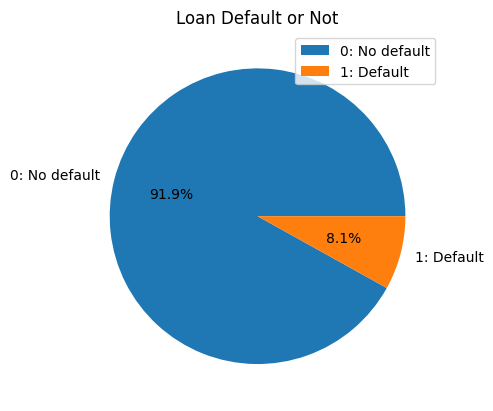

In [19]:
default = ["0: No default", "1: Default"]
plt.pie(temp, labels =default, autopct='%1.1f%%')
plt.title("Loan Default or Not")
plt.legend()
plt.show()

As we can see above, the data is highly imbalanced. This is expected given Home Credit's business model. Defaults should be significantly fewer than non defaults.

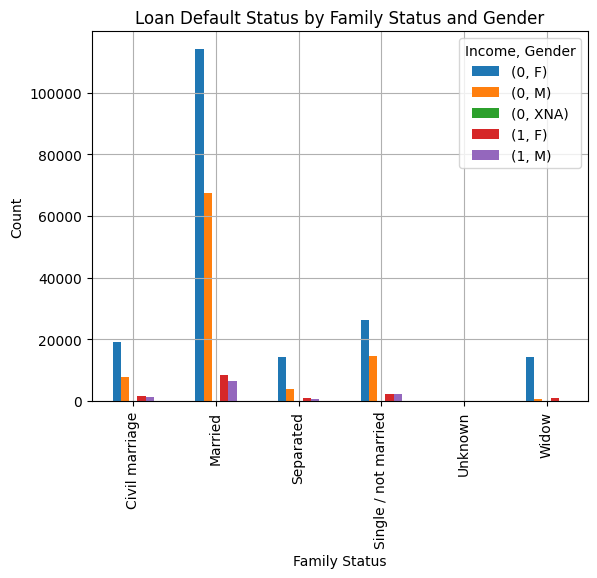

In [20]:
#create pivot table to loan default based on family status and gender
family_status = application_train.pivot_table(index = ["NAME_FAMILY_STATUS"],
                                      columns= ["TARGET", "CODE_GENDER"],
                                      values = 'SK_ID_CURR', aggfunc="count")
family_status.plot(kind='bar', stacked = False)
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.title('Loan Default Status by Family Status and Gender')
plt.legend(title = 'Income, Gender')
plt.grid(True)
plt.show()

On the above table and visual, we can see that there are null values on our data where the customer refused to provide the gender and which family status they fall under. We can determine the gender based on the other information provided or we can use 'mode' of the column to replace it.

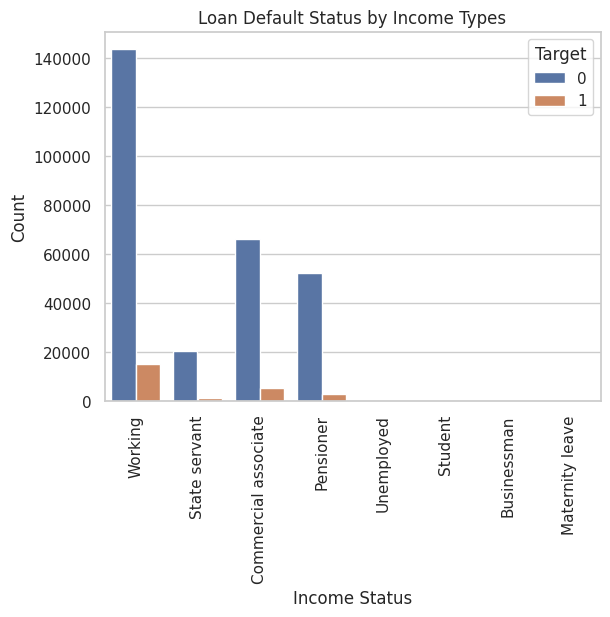

In [21]:
#Loan default by income type
sns.set(style="whitegrid")
income = sns.countplot(x='NAME_INCOME_TYPE', hue = 'TARGET',
                       data = application_train)
plt.xlabel('Income Status')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Loan Default Status by Income Types')
plt.legend(title = 'Target')
plt.show()

This shows on how loan default target is behaving based on the consumer's income type. As you can see above, 10% of 'working' defaulted on loans. 2 out of 3 maternity leave income type defaulted on the loan.

### Correlation

In [22]:
correlation_matrix = application_train.corr()
correlation_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


Correlation matrix of the entire dataset shows us each variable are correlated with other variables in the dataset. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. This helps us understand if we should we looking at this two values together to determine how the combination is impacting our target variable.

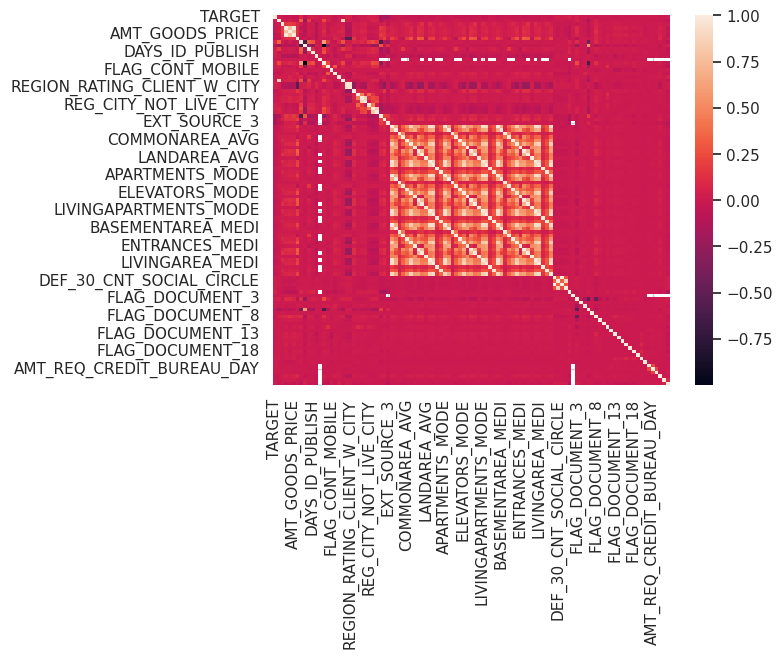

In [23]:
cor = application_train.drop('SK_ID_CURR',axis=1).corr()
sns.heatmap(cor)
plt.show()

In [24]:
correlation_target = correlation_matrix["TARGET"]
correlation_target = correlation_target.sort_values(ascending=True)
correlation_target

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 106, dtype: float64

## Discussing EDA Findings

We begin by reviewing the first few rows of each table to look at what data is available to us. We then must review what type of data it is, whether it is already cleaned, and wether or not we can actually make use of the fields given their missing or outlier data.

In this data, we have a mixed bag of information. Many columns are fully complete, many have more NAs than datapoints. Thankfully, the columns that do not have missing data will be important to our model; however, we will need to clean several columns for our model because of their NA values or their outlier data that is more erroneous than a true outlier.



##<a name = "data_cleaning"> 3. Data Cleaning</a>


#### <a name = "outlier">Outliers- Identifcation and handling</a>

In [25]:
# Identification of Column types
numeric_columns = application_train_copy.select_dtypes(include=['int', 'float']).columns
numeric_columns_test = application_test_copy.select_dtypes(include=['int', 'float']).columns

# Find columns with object/string data type
object_columns = application_train_copy.select_dtypes(include=['object']).columns
object_columns_test = application_test_copy.select_dtypes(include=['object']).columns

binary_columns = []
for column in application_train_copy.columns:
    unique_values = application_train_copy[column].value_counts()
    if set(unique_values.index).issubset([0, 1]):
        binary_columns.append(column)

binary_columns_test = []
for column in application_test_copy.columns:
    unique_values = application_test_copy[column].value_counts()
    if set(unique_values.index).issubset([0, 1]):
        binary_columns.append(column)

In [26]:
# Function for removing Outliers
def remove_outliers_zscore(df, threshold=3):
    # Calculate the z-scores for each column in the dataframe
    z_scores = np.abs(df - df.mean()) / df.std()

    # Identify the rows that are outliers
    outlier_mask = z_scores > threshold

    # Drop the outlier rows from the dataframe
    df = df.loc[~outlier_mask]

    return df

In [27]:
#Removal of outliers from numeric columns( excluding binary columns)
for column in numeric_columns:
  if column not in binary_columns:
    application_train_copy[column]= remove_outliers_zscore(application_train_copy[column], threshold=3)
    application_test_copy[column]= remove_outliers_zscore(application_test_copy[column], threshold=3)

In [28]:
application_train_copy.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,303239.000000,307057.000000,3.042560e+05,304540.000000,3.030600e+05,299099.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,264366.0,264503.0,257456.0,262757.000000,263691.000000,262628.000000
mean,278180.518577,0.080729,0.377976,166688.814515,5.827116e+05,26516.146698,5.193620e+05,0.019416,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.0,0.0,0.0,0.189879,0.237725,1.815016
std,102790.175348,0.272419,0.641509,87576.546445,3.712847e+05,13059.160652,3.329640e+05,0.010935,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.0,0.0,0.0,0.490190,0.539002,1.717580
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,144000.000000,5.084955e+05,24750.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,202500.000000,8.086500e+05,34209.000000,6.795000e+05,0.026392,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.000000
max,456255.000000,1.000000,2.000000,877500.000000,1.805985e+06,70582.500000,1.642500e+06,0.046220,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,3.000000,2.000000,7.000000


In [29]:
application_test_copy.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48138.000000,48173.000000,4.761500e+04,48215.000000,4.762500e+04,47179.000000,48744.000000,48744.000000,48620.000000,...,48744.000000,48744.0,48744.0,48744.0,42606.0,42625.0,42579.0,42341.0,42130.000000,42234.000000
mean,277796.676350,0.361502,172512.444369,4.847065e+05,28726.365571,4.324712e+05,0.019525,-16068.084605,67485.366322,-4937.344879,...,0.001559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511963,1.912298
std,103169.547296,0.628408,79460.459199,3.031901e+05,14402.201208,2.761099e+05,0.011178,4325.900393,144348.507136,3505.401743,...,0.039456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626249,1.713207
min,100001.000000,0.000000,26941.500000,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-15619.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,188557.750000,0.000000,112500.000000,2.598660e+05,17905.500000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7434.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,277549.000000,0.000000,157500.000000,4.410000e+05,26010.000000,3.735000e+05,0.018801,-15785.000000,-1293.000000,-4479.500000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
75%,367555.500000,1.000000,216000.000000,6.435000e+05,36747.000000,5.850000e+05,0.026392,-12496.000000,-296.000000,-1894.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3.000000
max,456250.000000,2.000000,481500.000000,1.611351e+06,77364.000000,1.471500e+06,0.046220,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,7.000000


In [30]:
application_train_copy['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
application_test_copy['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [32]:
#Removing XNA values in the gender Column
application_train_copy = application_train_copy.drop(application_train_copy[application_train_copy['CODE_GENDER']=='XNA'].index)
application_test_copy = application_test_copy.drop(application_test_copy[application_test_copy['CODE_GENDER']=='XNA'].index)

In [33]:
#create pivot table to loan default based on family status and gender
application_train_copy['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [34]:
application_train_cleaned= application_train_copy
application_test_cleaned= application_test_copy

### <a name="mdo"> Missing Data </a>

In [35]:
print(application_train_copy.shape)
print(application_test_copy.shape)

(307507, 122)
(48744, 121)


<Axes: >

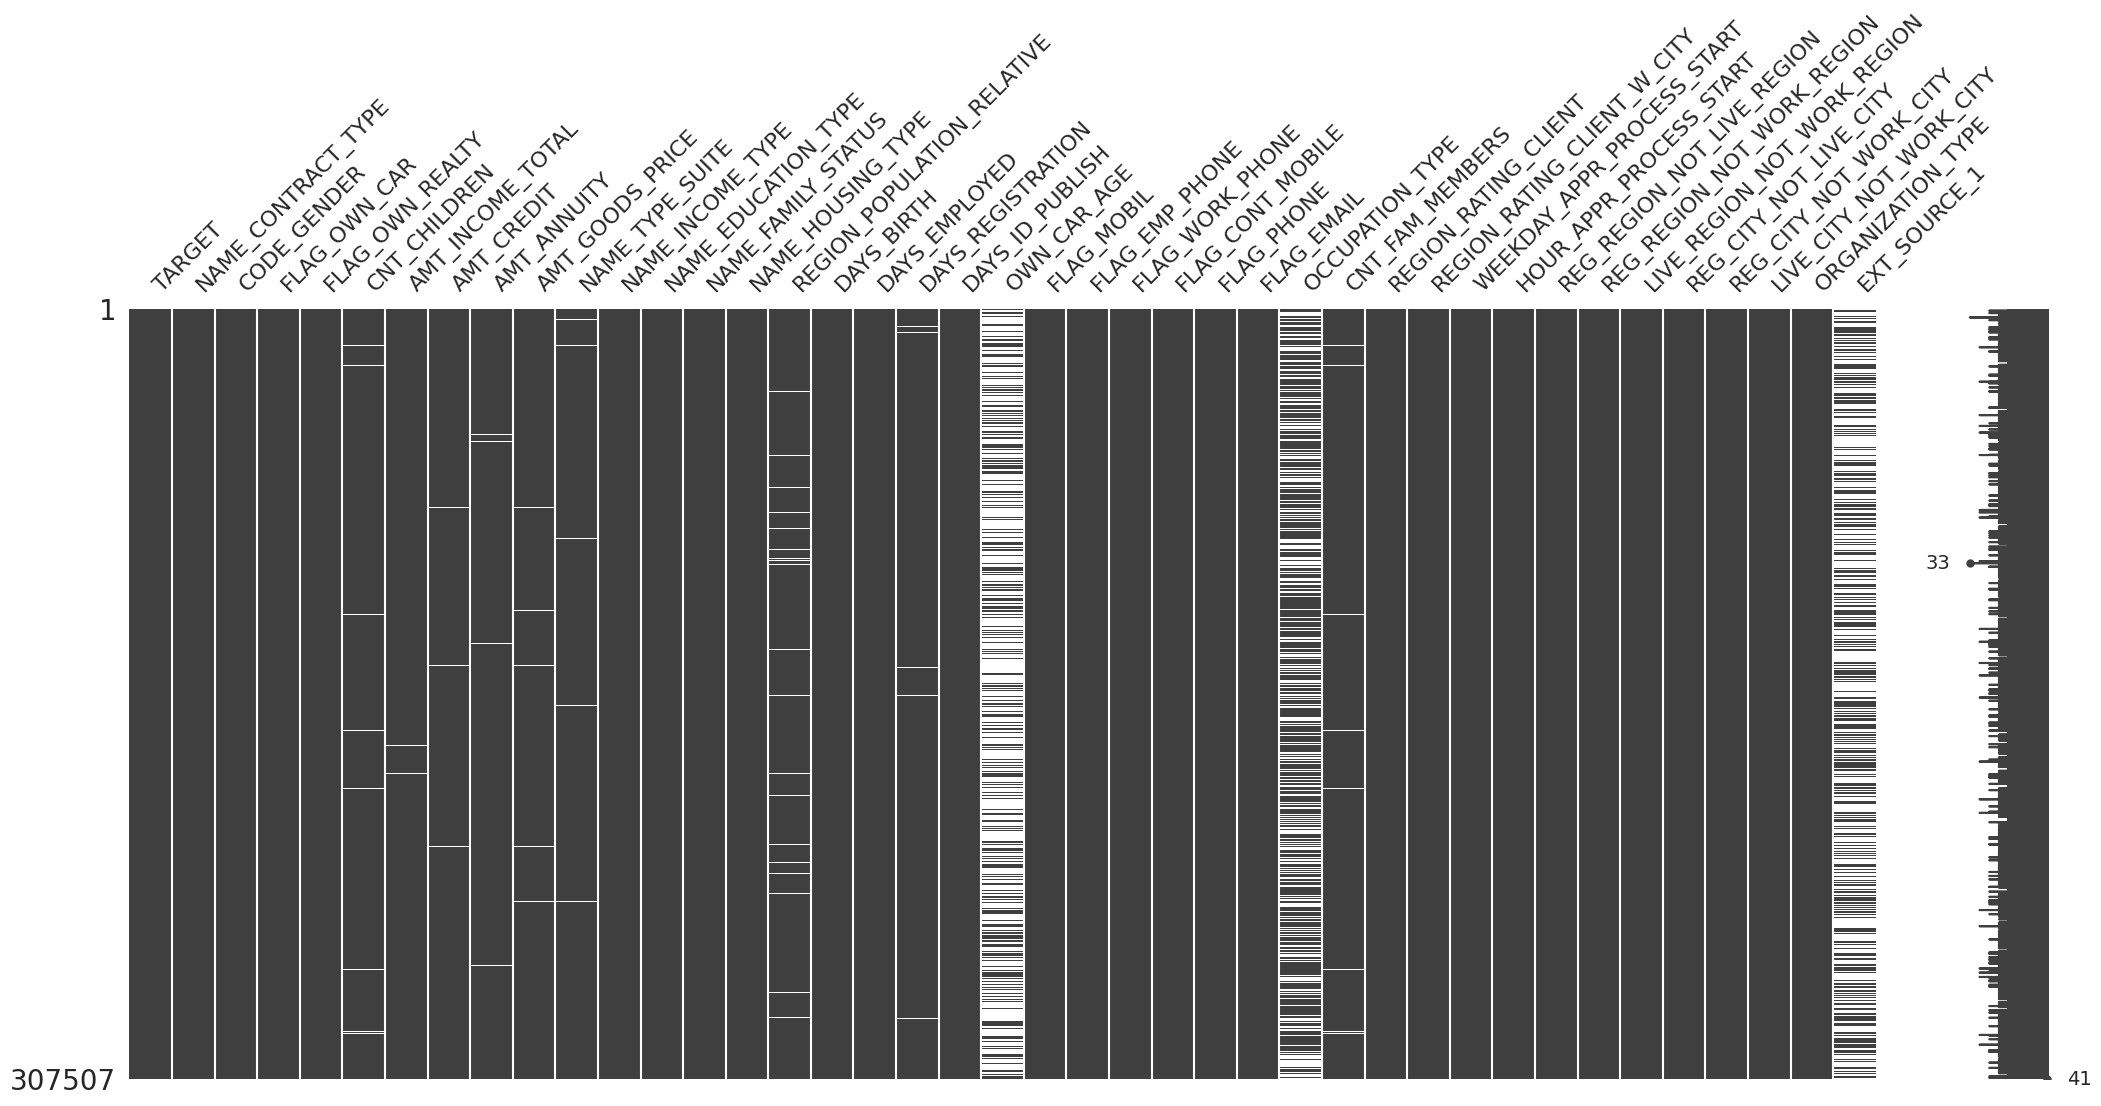

In [36]:
# Viewing Missing Data columns ( 1 to 42)
app_train_set1= application_train_copy.iloc[:,1:42]
msno.matrix(app_train_set1)

<Axes: >

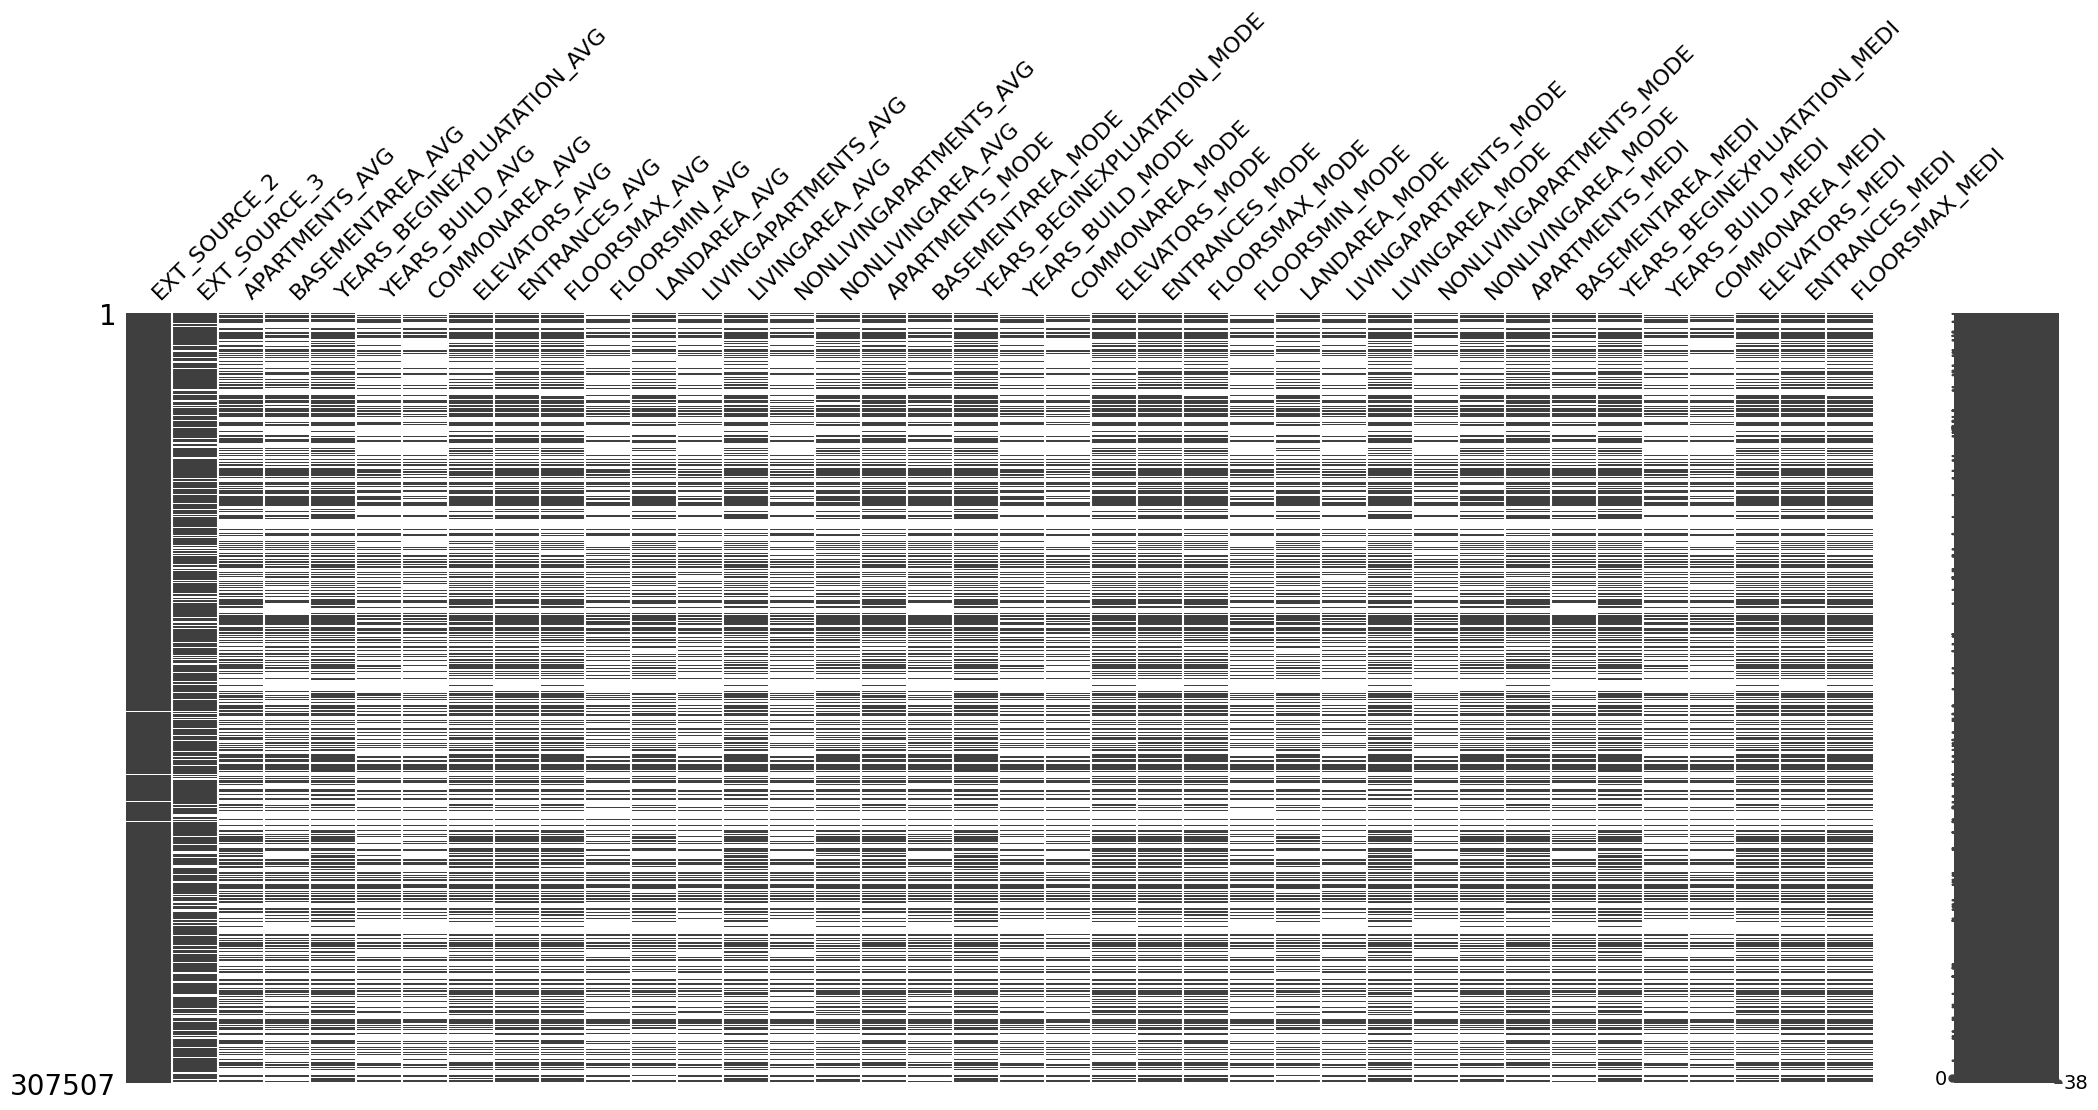

In [ ]:
# Viewing Missing Data columns ( 43 to 80)
app_train_set2= application_train_copy.iloc[:,42:80]
msno.matrix(app_train_set2)

<Axes: >

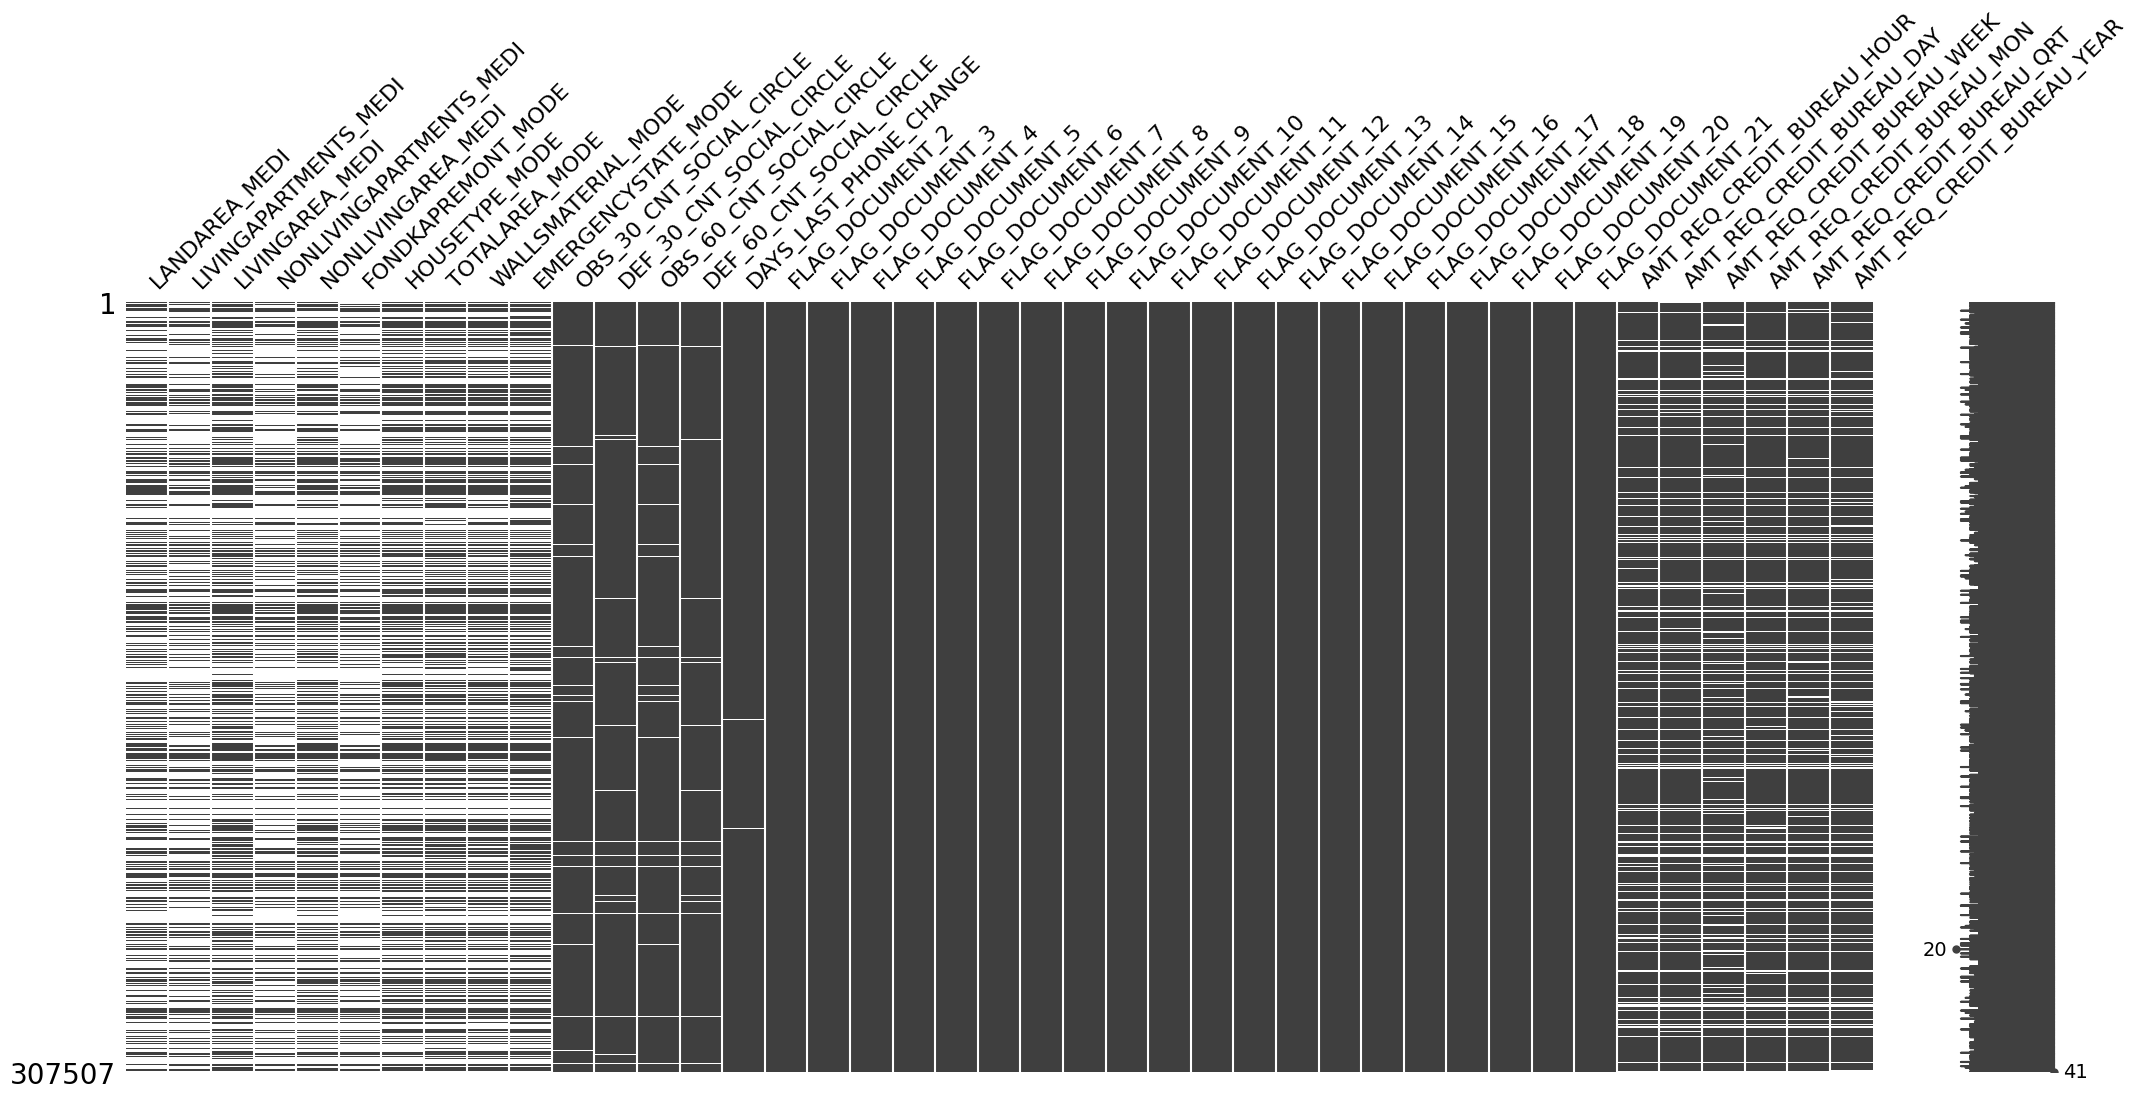

In [ ]:
# Viewing Missing Data columns ( 81 to 130)
app_train_set3= application_train_copy.iloc[:,81:130]
msno.matrix(app_train_set3)

By plotting the columns as above, it is easier for us to identify the columns with most missing values. Which leads us in identifying which columns are most relevant to use for the modeling process. This is a conscious decision as it is not practical to "fix" every single column of data that we ever work with. There is a real cost to doing so and if a column of data will not make a real impact on a model, it is prudent to actively decide if it should be cleaned or not.

### <a name = "drop_col">Handling missing data </a>

In [37]:
threshold = 0.5 * len(application_train)
# Drop columns with more than 50% null values excluding "Own_car_age" column
application_train_transformed = application_train_cleaned.drop([col for col in application_train_cleaned.columns if col !="OWN_CAR_AGE"  and application_train_cleaned[col].isnull().sum() > threshold], axis=1)
application_train_transformed= application_train_transformed.drop('SK_ID_CURR', axis=1)
application_train_transformed.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from pandas.core.internals.construction import create_block_manager_from_column_arrays

# Mapping of Avaialble columns to test dataset
columns_train = set(application_train_transformed.columns)
columns_test= set(application_test_cleaned.columns)

# Find the common columns
common_columns = list(columns_train.intersection(columns_test))
application_test_transformed= application_test_cleaned[common_columns]


In [39]:
print(application_test_transformed.shape)
print(application_train_transformed.shape)


(48744, 77)
(307507, 78)


In data preprocessing and data cleaning, removing columns with missing data more than 50% is a common approach to handling large amounts of missing information that can adversely affect the quality and reliability of the data.

### Data Imputation

In [40]:
from sklearn.impute import SimpleImputer

numeric_columns = application_train_transformed.select_dtypes(include='number').columns
categorical_columns = application_train_transformed.select_dtypes(include='object').columns

numeric_imputer = SimpleImputer(strategy='median')
application_train_transformed[numeric_columns] = numeric_imputer.fit_transform(application_train_transformed[numeric_columns])

# Impute missing values in categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
application_train_transformed[categorical_columns] = categorical_imputer.fit_transform(application_train_transformed[categorical_columns])


In [41]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
numeric_columns_test = application_test_transformed.select_dtypes(include='number').columns
categorical_columns_test = application_test_transformed.select_dtypes(include='object').columns

numeric_imputer_test = SimpleImputer(strategy='median')
application_test_transformed[numeric_columns_test] = numeric_imputer_test.fit_transform(application_test_transformed[numeric_columns_test])

# Impute missing values in categorical columns with most frequent
categorical_imputer_test = SimpleImputer(strategy='most_frequent')
application_test_transformed[categorical_columns_test] = categorical_imputer_test.fit_transform(application_test_transformed[categorical_columns_test])

After executing the provided code, the application_train_transformed DataFrame have all missing values in numeric columns replaced with their respective column medians and missing values in categorical columns replaced with their respective column modes. This imputation process helps ensure that the data is complete and ready for further analysis or modeling, where missing values can often lead to biased or erroneous results.

##<a name = "Data_encoding"> 4. Data Encoding</a>

In [42]:
# Identify categorical columns
categorical_columns = application_train_transformed.select_dtypes(include=['object']).columns

# Perform factorization on categorical columns
application_train_encoded = application_train_transformed.copy()
application_train_encoded[categorical_columns] = application_train_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Display the encoded DataFrame
application_train_encoded.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0,0,0,0,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0,1,0,1,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1,0,1,0,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,1,0,0,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0,0,0,0,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Identify categorical columns
categorical_columns = application_test_transformed.select_dtypes(include=['object']).columns

# Perform factorization on categorical columns
application_test_encoded = application_test_transformed.copy()
application_test_encoded[categorical_columns] = application_test_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Display the encoded DataFrame
application_test_encoded.head()

,AMT_GOODS_PRICE,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_12,FLAG_DOCUMENT_14,NAME_HOUSING_TYPE,FLAG_DOCUMENT_7,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_2,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLAG_WORK_PHONE,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_20,NAME_INCOME_TYPE,FLAG_DOCUMENT_18,HOUR_APPR_PROCESS_START,FLAG_DOCUMENT_15
0,450000.0,0.0,0.0,0.0,0.0,0,0.0,0.159520,0.0,1.0,...,0.0,0,0.9732,0.0,0.0,0.0,0,0.0,18.0,0.0
1,180000.0,0.0,0.0,0.0,0.0,0,0.0,0.432962,0.0,1.0,...,0.0,1,0.9816,0.0,0.0,0.0,0,0.0,9.0,0.0
2,630000.0,0.0,0.0,0.0,0.0,0,0.0,0.610991,0.0,1.0,...,0.0,2,0.9816,0.0,0.0,0.0,0,0.0,14.0,0.0
3,373500.0,0.0,0.0,0.0,0.0,0,0.0,0.612704,0.0,1.0,...,0.0,3,0.9970,0.0,0.0,0.0,0,0.0,11.0,0.0
4,625500.0,0.0,0.0,0.0,0.0,0,0.0,0.519097,0.0,1.0,...,0.0,3,0.9816,1.0,0.0,0.0,0,0.0,5.0,0.0


##<a name = "Upsampling"> 5. Data Upsampling</a>

In [44]:
from sklearn.utils import resample
import pandas as pd

# Separate the minority and majority class samples
minority_class = application_train_encoded[application_train_encoded['TARGET'] == 1]
majority_class = application_train_encoded[application_train_encoded['TARGET'] == 0]

# Upsample the minority class to match the majority class
upsampled_minority = resample(minority_class,
                              replace=True,  # sample with replacement
                              n_samples=len(majority_class),  # match the majority class size
                              random_state=42)  # set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
application_train_upsampled = pd.concat([upsampled_minority, majority_class])


In [45]:
application_train_upsampled.shape

(565364, 78)

The output of this code is the DataFrame application_train_upsampled, which contains the upsampled data with a balanced class distribution. The number of rows in this DataFrame will be twice the size of the original majority class, as the minority class is upsampled to match the size of the majority class.

The resulting DataFrame have all the columns and data from both the upsampled minority class and the majority class, with the minority class repeated to match the number of samples in the majority class. The order of the rows may vary depending on the random seed used during resampling.

### Identifying Co-relations

In [46]:
# Identifying the co-relations
rev_correlation_matrix = application_train_encoded.corr()
correlation_target = rev_correlation_matrix["TARGET"].sort_values(ascending= False)
correlation_target.head(10).sort_values()

FLAG_DOCUMENT_3                0.044341
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.054838
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64

The output will show the top 10 highest correlations with the "TARGET" variable in ascending order. In other words, it will display the 10 variables that are most positively correlated with the "TARGET" variable. The variables listed at the top will have the highest positive correlation with the target variable, and those at the bottom will have lower positive correlations.

In [47]:
correlation_target.tail(10).sort_values()

EXT_SOURCE_2                 -0.160294
EXT_SOURCE_3                 -0.155899
NAME_INCOME_TYPE             -0.057022
CODE_GENDER                  -0.054710
DAYS_EMPLOYED                -0.044934
AMT_GOODS_PRICE              -0.034728
NAME_EDUCATION_TYPE          -0.032432
AMT_REQ_CREDIT_BUREAU_HOUR         NaN
AMT_REQ_CREDIT_BUREAU_DAY          NaN
AMT_REQ_CREDIT_BUREAU_WEEK         NaN
Name: TARGET, dtype: float64

##<a name = "data_ready"> 6.Analysis ready Data</a>

In [48]:
#Features Data set and Target Variable
# SK_ID_CURR is already removed

X= application_train_encoded.drop('TARGET', axis=1)
Y= application_train_encoded.TARGET
Xtest= application_test_encoded


##<a name = "regression"> 7. Regression model</a>

### Regression Without Interactions

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X.loc[:, ~X.columns.isin(['CAR_AGE_BINS'])], Y, test_size=0.35, random_state=0, stratify= Y)

Y_train.sum()
Y_test.sum()

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

# Initialize the logistic regression model
logreg_reg = LogisticRegression()

# Fit the model to the training data
logreg_reg.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = logreg_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
auc_roc = roc_auc_score(Y_test, logreg_reg.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

X_train (199879, 77)
X_test (107628, 77)
Y_train (199879,)
Y_test (107628,)
Accuracy: 0.9192682201657562
AUC-ROC: 0.6121043163115449


The output  include the count of positive target values in both the training and testing sets, the shape of the training and testing data, the accuracy of the logistic regression model, and the AUC-ROC score, which provides a measure of the model's performance in binary classification tasks.

### Regression with selected features

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# feature Data set
X1= X[['EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER','NAME_INCOME_TYPE','DAYS_EMPLOYED','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT']]
print(X1.shape)
print(Y.shape)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.35, random_state=0, stratify= Y)

Y_train.sum()
Y_test.sum()

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

# Initialize the logistic regression model
logreg_features = LogisticRegression()

# Fit the model to the training data
logreg_features.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = logreg_features.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
auc_roc = roc_auc_score(Y_test, logreg_features.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

(307507, 9)
(307507,)
X_train (199879, 9)
X_test (107628, 9)
Y_train (199879,)
Y_test (107628,)
Accuracy: 0.9192682201657562
AUC-ROC: 0.5903034057037422


The code provided performs logistic regression on a selected set of features from the dataset. The dataset is split into training and testing sets, with 65% used for training and 35% for testing. The logistic regression model is trained on the training data and then evaluated on the testing data. The output includes the count of positive target values in both the training and testing sets, as well as the shapes of the training and testing datasets. Additionally, it provides the accuracy of the model on the testing set, indicating the percentage of correctly predicted target values. Furthermore, the AUC-ROC score is calculated, which measures the model's ability to distinguish between positive and negative classes. This score quantifies the model's performance, with a higher value indicating better predictive power.

### Regression with interactions

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_interact = X.copy()

X_interact['EXT_SOURCE'] = (X['EXT_SOURCE_2']+ X['EXT_SOURCE_2'])/2
X_interact['REG_RATING'] = (X['REGION_RATING_CLIENT_W_CITY']+X['REGION_RATING_CLIENT'])/2

# feature Data set
X2= X_interact[['EXT_SOURCE','REG_RATING','CODE_GENDER','NAME_INCOME_TYPE','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE']]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.30, random_state=0, stratify= Y)

Y_train.sum()
Y_test.sum()

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

# Initialize the logistic regression model
logreg_interactions = LogisticRegression()

# Fit the model to the training data
logreg_interactions.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = logreg_interactions.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
auc_roc = roc_auc_score(Y_test, logreg_interactions.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

X_train (215254, 7)
X_test (92253, 7)
Y_train (215254,)
Y_test (92253,)
Accuracy: 0.9192654981409819
AUC-ROC: 0.5896708525928346


### Data Normalisation

In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Train_normalised= application_train_encoded.copy()
# Create a DataFrame from the dictionary

numeric_cols = Train_normalised.select_dtypes(include=['int', 'float']).columns

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
Train_normalised[numeric_cols] = scaler.fit_transform(Train_normalised[numeric_cols])

Train_normalised.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,0.0,0.0,0.0,0.0,0.207607,0.205338,0.334725,0.193820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
1,0.0,0.0,1.0,0.0,1.0,0.0,0.286846,0.708980,0.494193,0.679775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,1.0,0.0,1.0,0.0,0.0,0.049128,0.051108,0.074449,0.058989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.128368,0.152007,0.407021,0.160112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
4,0.0,0.0,0.0,0.0,0.0,0.0,0.112520,0.265760,0.293619,0.294944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


The code performs Min-Max normalization on the numeric columns of the DataFrame Train_normalised, scaling the data to the range [0, 1]. This process helps to standardize the numeric features and ensures they are within the same scale. The output displays the first few rows of the normalized DataFrame, allowing us to observe the transformed values of the numerical features.

In [53]:
Train_normalised.shape

(307507, 78)

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Test_normalised= application_test_encoded.copy()
# Create a DataFrame from the dictionary

numeric_cols = Test_normalised.select_dtypes(include=['int', 'float']).columns

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
Test_normalised[numeric_cols] = scaler.fit_transform(Test_normalised[numeric_cols])

Test_normalised.head()

,AMT_GOODS_PRICE,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_12,FLAG_DOCUMENT_14,NAME_HOUSING_TYPE,FLAG_DOCUMENT_7,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_2,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLAG_WORK_PHONE,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_20,NAME_INCOME_TYPE,FLAG_DOCUMENT_18,HOUR_APPR_PROCESS_START,FLAG_DOCUMENT_15
0,0.283912,0.0,0.0,0.0,0.0,0.0,0.0,0.180263,0.0,1.0,...,0.0,0.000000,0.751391,0.0,0.0,0.0,0.0,0.0,0.833333,0.0
1,0.094637,0.0,0.0,0.0,0.0,0.0,0.0,0.490287,0.0,1.0,...,0.0,0.017544,0.829314,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
2,0.410095,0.0,0.0,0.0,0.0,0.0,0.0,0.692134,0.0,1.0,...,0.0,0.035088,0.829314,0.0,0.0,0.0,0.0,0.0,0.611111,0.0
3,0.230284,0.0,0.0,0.0,0.0,0.0,0.0,0.694076,0.0,1.0,...,0.0,0.052632,0.972171,0.0,0.0,0.0,0.0,0.0,0.444444,0.0
4,0.406940,0.0,0.0,0.0,0.0,0.0,0.0,0.587946,0.0,1.0,...,0.0,0.052632,0.829314,1.0,0.0,0.0,0.0,0.0,0.111111,0.0


### Analysis ready Dataset( with Normalisation)

In [55]:
Y1= Train_normalised.TARGET
X1= Train_normalised.drop('TARGET', axis=1)
Xtest1=Test_normalised

##<a name = "Randomforest"> 8.RandomForest model</a>

X1_train (215254, 77)
X1_test (92253, 77)
Y1_train (215254,)
Y1_test (92253,)
Accuracy: 0.9190378632673192
AUC-ROC: 0.7343362855368393


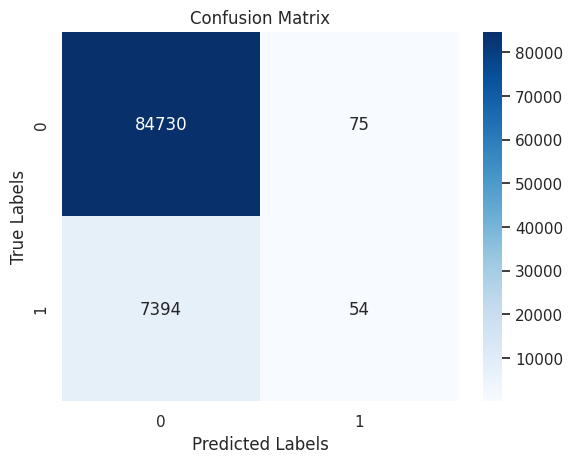

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


# Split the data into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.30, random_state=0, stratify= Y)

Y1_train.sum()
Y1_test.sum()

print('X1_train', X1_train.shape)
print('X1_test', X1_test.shape)
print('Y1_train', Y1_train.shape)
print('Y1_test', Y1_test.shape)

# Initialize the logistic regression model
logreg_normalised = LogisticRegression()

# Fit the model to the training data
logreg_normalised.fit(X1_train, Y1_train)

# Predict the target variable for the test data
y1_pred = logreg_normalised.predict(X1_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y1_test, y1_pred)
print("Accuracy:", accuracy)

auc_roc = roc_auc_score(Y1_test, logreg_normalised.predict_proba(X1_test)[:, 1])
print("AUC-ROC:", auc_roc)

cm= confusion_matrix(Y1_test, y1_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

The provided code performs logistic regression on the normalized dataset, which was previously split into training and testing sets. It first calculates and displays the count of positive target values in both the training and testing sets. The training data consists of `X1_train` features and `Y1_train` target variable, while the testing data consists of `X1_test` features and `Y1_test` target variable. The logistic regression model is initialized, trained on the training data, and used to predict the target variable for the test data. The model's accuracy on the testing set is calculated and printed. Additionally, the AUC-ROC score, a performance metric for binary classification tasks, is computed and displayed.  Overall, this code enables the evaluation of the logistic regression model's accuracy, AUC-ROC score, and confusion matrix, providing essential metrics to assess the model's performance in a binary classification problem.

In [57]:
Test_normalised = Test_normalised.reindex(columns=X1.columns)
Y_pred_test = logreg_normalised.predict(Test_normalised)
Y_pred_test_df= pd.DataFrame(Y_pred_test)
Y_pred_test_df.head()
Test_output = pd.concat([application_test['SK_ID_CURR'], Y_pred_test_df], axis=1)
Test_output.to_csv('Output_logreg3.csv', index=False)

### RandomForest- Classifier Model ( without normalisation)

In [58]:
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify= Y)

RandomForest_regular= RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
RandomForest_regular.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

The code uses the Random Forest Classifier from scikit-learn to perform a classification task. The dataset is split into training and testing sets, with 70% used for training and 30% for testing. The Random Forest model is initialized with 100 decision trees and uses the entropy criterion to split nodes during the tree-building process. The model is then trained on the training data. The output does not include any further evaluation or visualization of the model's performance, but it sets up the RandomForest_regular model for future evaluation and predictions on the testing set.

 Precision of Model:  0.5909090909090909
 Accuracy:  0.9193088571645367
 Recall of Model:  0.001745435016111708
 f1 of Model:  0.0034805890227576977
 AUC_ROC:  0.5008196545990293


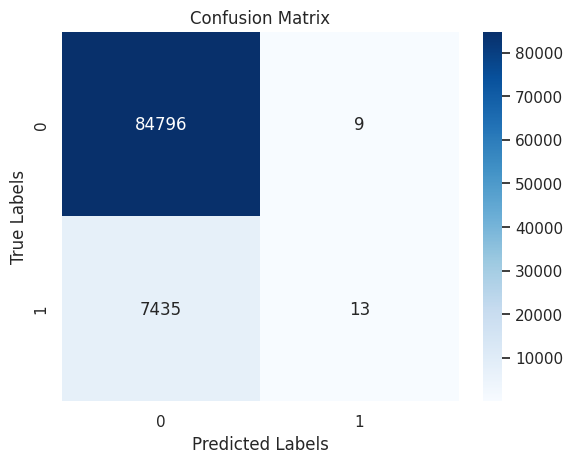

In [59]:
Y_pred= RandomForest_regular.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
# Calculate AUC
auc = roc_auc_score(Y_test, Y_pred)

print(" Precision of Model: ", precision)
print(" Accuracy: ", accuracy)
print(" Recall of Model: ", recall)
print(" f1 of Model: ", f1)
print(" AUC_ROC: ", auc)

cm= confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

The code evaluates the Random Forest Classifier's performance on the testing set using precision, recall, F1 score, accuracy, and AUC-ROC score as evaluation metrics. It generates a confusion matrix heatmap to visualize classification results. The precision score represents the correctly predicted positive samples among all predicted positives, recall measures the correctly predicted positive samples among all actual positives, and F1 score provides a balanced measure of precision and recall. Accuracy is the proportion of correctly classified samples, and AUC-ROC score assesses the model's ability to distinguish between the two classes. The evaluation results and confusion matrix visualization help to assess the model's performance in the binary classification task.

In [60]:
Xtest = Xtest.reindex(columns=X.columns)
Y_pred_test1 = RandomForest_regular.predict(Xtest)

Y_pred_test_df1= pd.DataFrame({'TARGET': Y_pred_test1})
Test_output1 = pd.concat([application_test['SK_ID_CURR'], Y_pred_test_df1], axis=1)
Test_output1.to_csv('Output_Randomforest_reg3.csv', index=False)


### RandomForest- Classifier Model with Normalised Data

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0, stratify= Y)

RandomForest_Normalised= RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
RandomForest_Normalised.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

 Precision of Model:  0.5833333333333334
 Accuracy:  0.9193088571645367
 Recall of Model:  0.0018796992481203006
 f1 of Model:  0.0037473233404710917
 AUC_ROC:  0.5008808908362529


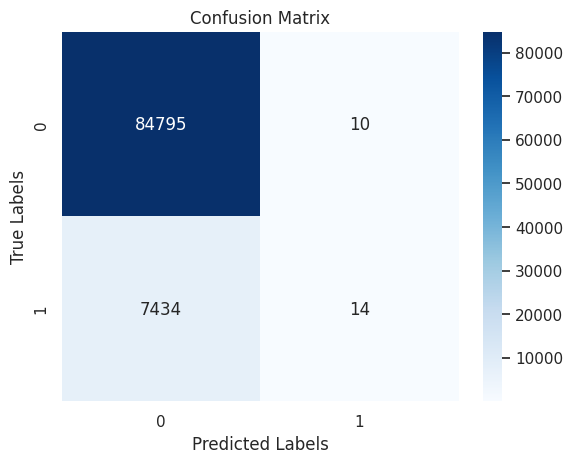

In [62]:
Y_pred= RandomForest_Normalised.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
# Calculate AUC
auc = roc_auc_score(Y_test, Y_pred)

print(" Precision of Model: ", precision)
print(" Accuracy: ", accuracy)
print(" Recall of Model: ", recall)
print(" f1 of Model: ", f1)
print(" AUC_ROC: ", auc)

cm= confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


##<a name = "results"> 9. Results</a>

Exploring various models provided us with a comprehensive understanding of their strengths, weaknesses, and performance in the context of our work. It facilitated the process of selecting the most suitable model, maximizing its performance, interpreting feature significance, assessing robustness, and leveraging model diversity to improve predictions and gain valuable insights.

**Selecting the right model for the job:**

Since our task involved classification, we began by evaluating different classification models. We experimented with logistic regression, Random Forest, and various versions of Gradient Boosting Machine.

**Performance Comparison:**

Comparing the performances of different models allowed us to identify the most effective one. Taking into account the Kaggle score, we proceeded with the model that achieved the best results. Random Forest and Gradient Boosting Machine performed better than the default decision tree model, but we addressed some overfitting issues. Ultimately, we chose the Gradient Boosting Machine due to its faster training capabilities.


**XGB- up sampling performance**

After collective discussion, one of our team members exceuted XGB classifier with up sampled data. The Model gave very good performance  with an accuracy of 0.7162 and AUC-ROC of 0.8482. We achieved the Kaggle score of 0.6745 when we submitted the output.



